<a href="https://colab.research.google.com/github/AnujKAksh89/PlayStoreAnalysis/blob/main/NYC_Taxi_Travel_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

NYC Taxi Trip is an extremely detailed dataset of New York City taxi trip records from every taxi trip. This dataset collected various sets of information on each individual taxi trips including the pickup and drop-off location, time and duration of the trip, distance travelled, and fare amount. You’ll see that this data qualifies as real-world data, not only because of the way it has been generated but also in the way that it’s messy: there are missing data, spurious records, unimportant columns, baked-in biases, and so on.

Travel time prediction is crucial in developing mobility on demand systems and traveller information systems. Precise estimation of travel time supports the decision-making process for riders and drivers who use such systems. In this document, static travel time for taxi trip trajectories is predicted by applying isolated XGBoost regression models to a set of identified inlier and extreme-conditioned trips and the results are compared with other existing best models in this context.

# **GitHub Link -**

https://github.com/AnujKAksh89/PlayStoreAnalysis/blob/main/NYC_Taxi_Travel_Time_Prediction.ipynb

# **Problem Statement**


## <b> Problem Description </b>

### Main objective is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 34.0 MB/s eta 0:00:00


In [ ]:
# To calculate Haversine Distance from Longitude and Lattitude
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

from numpy import math
from haversine import haversine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve

import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone_Project_2/NYC Taxi Trip Time/'
taxi_df = pd.read_csv(working_directory + 'NYC Taxi Data.csv', encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
taxi_df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
taxi_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
taxi_df.isnull().sum()
# No missing value found

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
# sns.heatmap(taxi_df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform containing 1458644 trip records. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
taxi_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
taxi_df[taxi_df['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [ ]:
# Removing data with zero passenger count
taxi_df = taxi_df[taxi_df['passenger_count']!=0]

In [ ]:
taxi_df.shape

(1458584, 11)

In [ ]:
# Convert string date to datetime features.
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df.pickup_datetime)
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df.pickup_datetime)

In [ ]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
#Calculate distance and assign new column to the dataframe.
taxi_df["distance"] = taxi_df.apply(lambda x: calc_distance(x),axis=1)

In [ ]:
# Adding new features related to datetime
taxi_df.loc[:, 'pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df.loc[:, 'pickup_weekday'] = taxi_df['pickup_datetime'].dt.day_name()
taxi_df.loc[:, 'pickup_date'] = taxi_df['pickup_datetime'].dt.day
taxi_df.loc[:, 'pickup_month'] = taxi_df['pickup_datetime'].dt.month
taxi_df.loc[:, 'pickup_day'] = taxi_df['pickup_datetime'].dt.dayofweek

In [ ]:
# Function to Calculate peak hours
def baseFare(x):
    if x in range(16,20):
        Peak_Hour = 2
    elif x in range(20,24):
        Peak_Hour = 1
    else:
        Peak_Hour = 0
    return Peak_Hour

In [ ]:
# Calculating Peak Hours
taxi_df['Peak_Hour'] = taxi_df['pickup_hour'].apply(baseFare)

In [ ]:
bins=np.array([0,1800,3600,5400,7200,90000])
taxi_df['duration_time']=pd.cut(taxi_df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [ ]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
taxi_df['pickup_timezone']=taxi_df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
taxi_df['dropoff_timezone']=taxi_df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

### What all manipulations have you done and insights you found?

One hot encoding is for nominal values and label encoding for ordinal values which have inherent order within them, to prevent the loss of information from them. One hot encoder does not preserve the order of the information. The order information will be lost while working with One hot encoder on ordinal variables The limitation with label encoding is that it prioritizes the classes based on the labels provided by it. This might convey unnecessary information to the model that the class with label 2 is superior to the class with label 1. In 'store_and_fwd_flag', only two values are present either 'Y' or 'N'. So it is better to replace Y with 1 and N with zero.

To calculate the distance (km) between pickup and dropoff points. Difference between pickup and dropoff points will give an idea about the distances covered which should be the most predictive feature for taxi fare. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

The haversine formula approximates the great-circle distance between two points on a sphere given their longitudes, latitudes and the sphere’s radius. The sphere we are interested in here is the Earth – which is not a perfect sphere, but close enough for the approximations that we are interested in. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.

Haversine distance can be found using geopy library, scikitlearn library, or by implementing Haversine formula by defining a custom made function. All three methods are described below.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

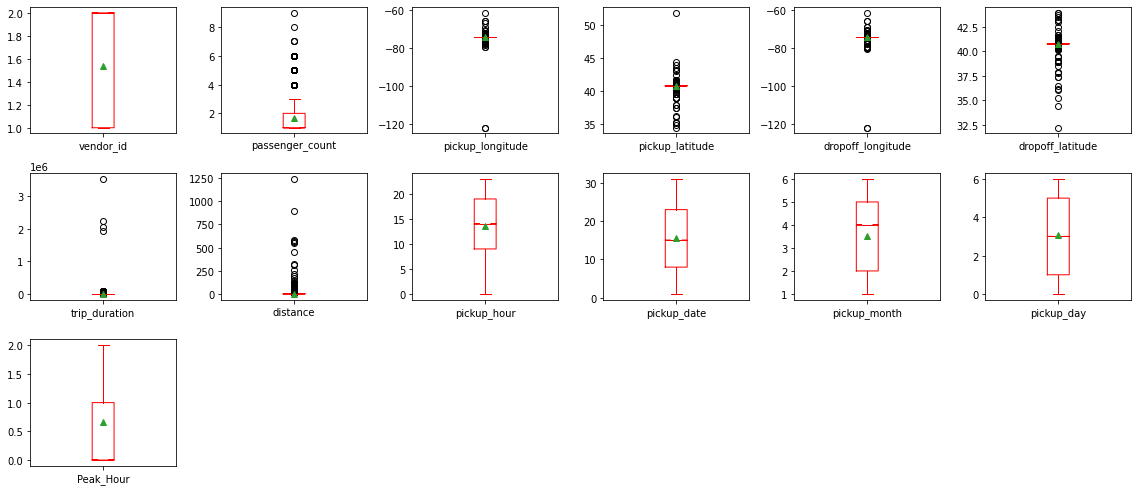

In [ ]:
# Chart - 1 visualization code
taxi_df.plot(kind = 'box', subplots = True, notch=True, showmeans=True, layout = (4,6), figsize = (16,9), color = 'red')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

From the box plot it is clearly visible that there are outliers and might create problems at the prediction stage  (specifically passenger_count distance and trip_duration). One idea is to log transform or square root transform the distance before prediction to visualise it better. Replacing outliers with whisker values is another methods of treating outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values. Extreme low value or extreme high value might not be correct and can impact the result effectively. In this case, considering that these outliers need treatment before going to model.

#### Chart - 2

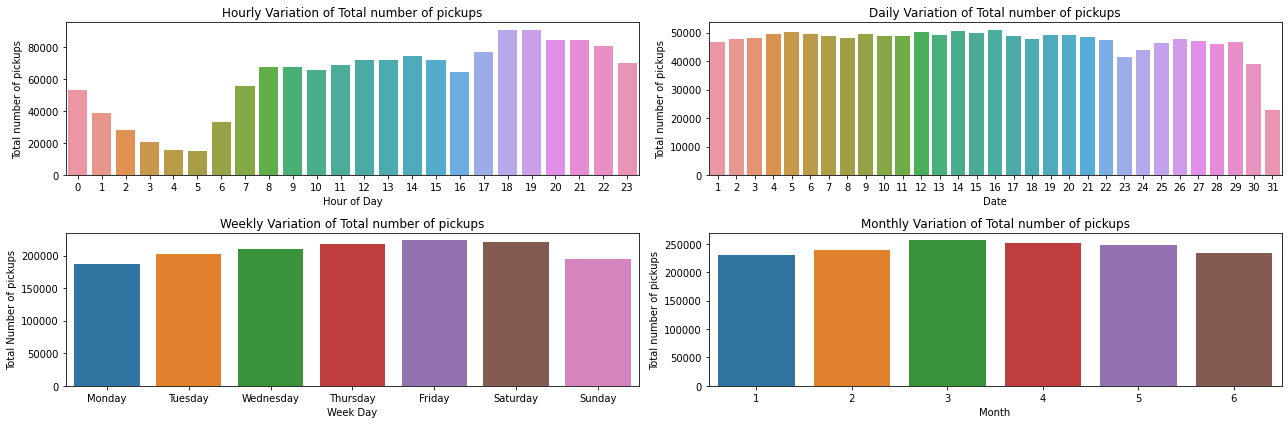

In [ ]:
# Chart - 2 visualization code
# Datetime features
plt.figure(figsize=(18, 6))

# Hour of day
plt.subplot(221)
sns.countplot(taxi_df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Hourly Variation of Total number of pickups')

# Date
plt.subplot(222)
sns.countplot(taxi_df['pickup_date'])
plt.xlabel('Date')
plt.ylabel('Total number of pickups')
plt.title('Daily Variation of Total number of pickups')

# Day of week
plt.subplot(223)
sns.countplot(taxi_df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Weekly Variation of Total number of pickups')

# Month
plt.subplot(224)
sns.countplot(taxi_df['pickup_month'])
plt.xlabel('Month')
plt.ylabel('Total number of pickups')
plt.title('Monthly Variation of Total number of pickups')
plt.tight_layout();

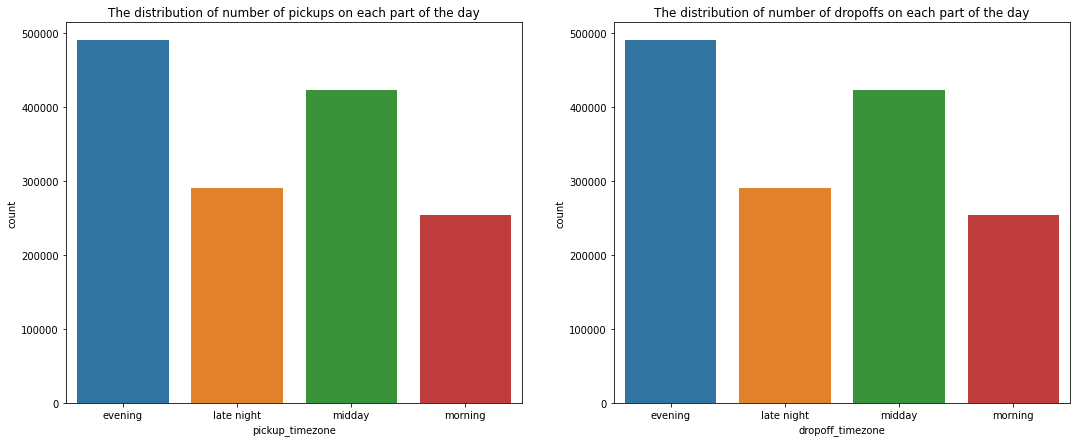

In [ ]:
# Distribution of the number of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,7))
sns.countplot(x='pickup_timezone', data=taxi_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone', data=taxi_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

##### 1. Why did you pick the specific chart?

Subplots mean groups of axes that can exist in a single matplotlib figure. It provides control over all the individual plots that are created. When analyzing data you might want to compare multiple plots placed side-by-side, subplots help in this case.

##### 2. What is/are the insight(s) found from the chart?

* Even though, contrary to the expectation, number of pickups is much lower during the morning peak hours, it is highest in late evenings as expected.
* Number of pickups on sundays and mondays are much lower than other days with a peak on Saturday.
* Monthly plot shows significant variation towards the end of the month.
* Annual variation visible with March - April showing maximum number of trips compared to the other 4 months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using these insights an organization can easily know about the peak hours or peak time which affect the business. As we know from studies, peak hour traffic in major Indian cities almost doubles the travel time along some popular routes. Using this study an organization can plan according to reduce the negative impact on their business.

#### Chart - 3

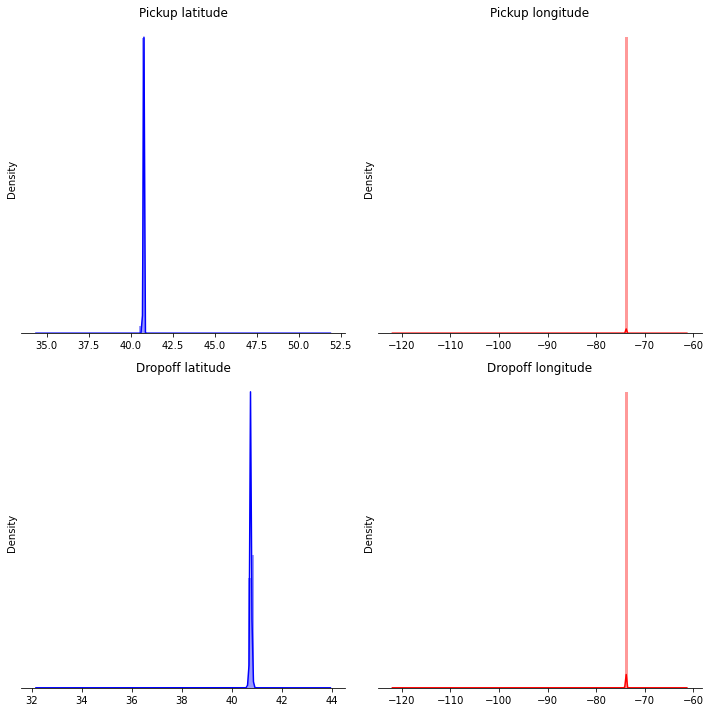

In [ ]:
# Chart - 3 visualization code
f, axes = plt.subplots(2,2,figsize=(10, 10))
sns.despine(left=True)
sns.distplot(taxi_df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
axes[0,0].set_title('Pickup latitude')
sns.distplot(taxi_df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
axes[0,1].set_title('Pickup longitude')
sns.distplot(taxi_df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1,0])
axes[1,0].set_title('Dropoff latitude')
sns.distplot(taxi_df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
axes[1,1].set_title('Dropoff longitude')
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

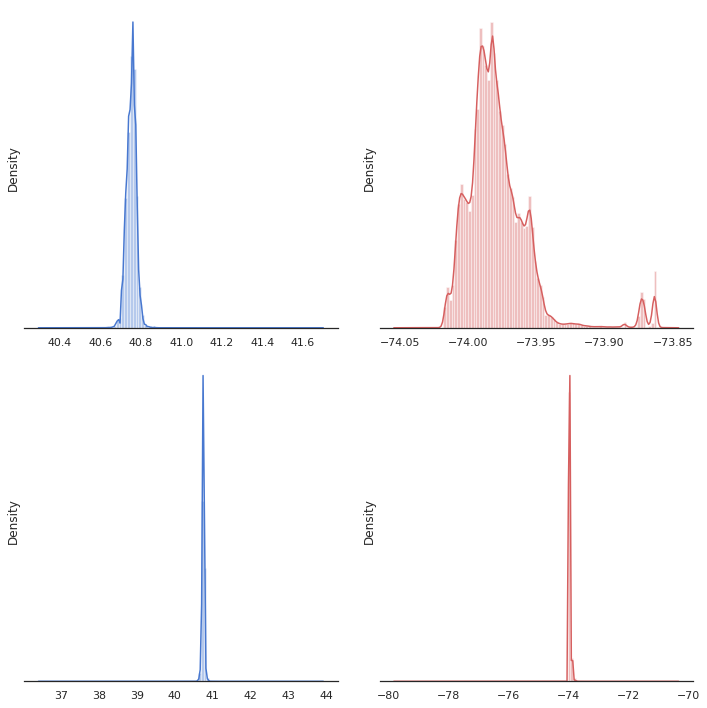

In [ ]:
df = taxi_df.loc[(taxi_df.pickup_latitude > 40.6) & (taxi_df.pickup_latitude < 40.9)]
df = taxi_df.loc[(taxi_df.dropoff_latitude>40.6) & (taxi_df.dropoff_latitude < 40.9)]
df = taxi_df.loc[(taxi_df.dropoff_longitude > -74.05) & (taxi_df.dropoff_longitude < -73.85)]
df = taxi_df.loc[(taxi_df.pickup_longitude > -74.05) & (taxi_df.pickup_longitude < -73.85)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. In other words, distplot is used to observe how the data is distributed in a particular dataset. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

##### 2. What is/are the insight(s) found from the chart?

Findings - (Here, red represents pickup and dropoff Longitudes & blue represents pickup & dropoff lattitudes)

* From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73.
* Some extreme co-ordinates has squeezed the plot such that we see a spike here
* A good idea is to remove these outliers and look at the distribution more closely
* We have a much better view of the distribution of coordinates instead of spikes. And we see that most trips are concentrated between these lattitude and longitude only with a few significant clusters.
* These clusters are represented by the numerous peaks in the lattitude and longitude histograms.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using these details an organization can have a fare idea that which location can provide more trips and hence increase in profit. Unavailability of vehicle can be decreased using these details.

#### Chart - 4

(-74.03, -73.75)

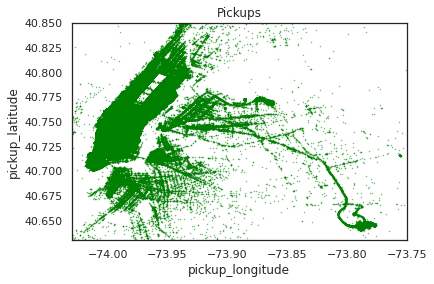

In [ ]:
# Chart - 4 visualization code
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

taxi_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

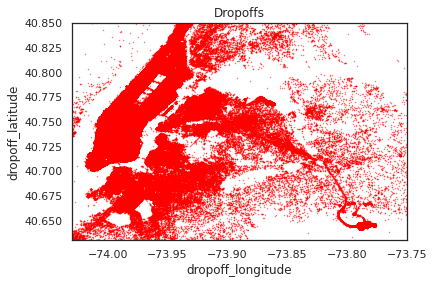

In [ ]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

taxi_df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
import folium
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12, control_scale=True)
for i in taxi_df.index[:100]:
  folium.Marker(location=[taxi_df['pickup_latitude'][i], taxi_df['pickup_longitude'][i]],icon=folium.Icon(color="blue")).add_to(nyc)
nyc

In [ ]:
for i in taxi_df.index[:100]:
  folium.Marker(location=[taxi_df['dropoff_latitude'][i], taxi_df['dropoff_longitude'][i]],icon=folium.Icon(color="red", icon="info-sign")).add_to(nyc)
nyc

##### 1. Why did you pick the specific chart?

Data visualization projects sometimes have a geographical component. These may include the distribution of certain phenomena in a country, region, or continent, the geo-location of different items of interest, or other similar things. The geographical dimension is important and has to be part of the data visualization to drive the insight home.

##### 2. What is/are the insight(s) found from the chart?

The Taxi pickup locations by placing longitude and lattitude marker on the MAP of the US. So that we can analyze below questions:

* Are all pickups constrained to NYC and it's surrounding areas?
* Is there any unusual location of the pickup?
* Are the lattitude longitude constrained to the land area of the US and nowhere else?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are several benefits to using geographical charts. First, they help us understand the relationships between locations. This can help understand things like trade and migration patterns.

There are many benefits to using geographical charts when traveling. For example, studying a map chart can help you spot freight to travel between different locations and establish a more effective chain of command.

#### Chart - 5

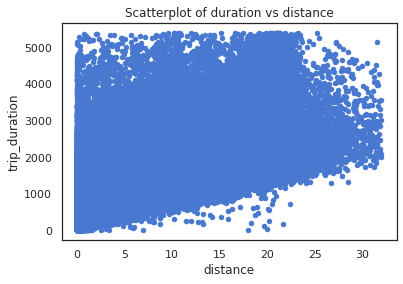

In [ ]:
# Chart - 5 visualization code
taxi_df[(taxi_df.trip_duration<=5400)&(taxi_df.distance<=32)].plot.scatter(
        y='trip_duration', x='distance',
        title="Scatterplot of duration vs distance"
    )

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that shows the relationship between different variables. This data is shown by placing various data points between an x- and y-axis. Essentially, each of these data points looks “scattered” around the graph, giving this type of data visualization its name

##### 2. What is/are the insight(s) found from the chart?

A scatter plot identifies a possible relationship between changes observed in two different sets of variables. It provides a visual and statistical means to test the strength of a relationship between two variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Its clearly visible that with the increase of distance trip duration increases. This relation is helpful in many ways in Travel industry.

#### Chart - 6

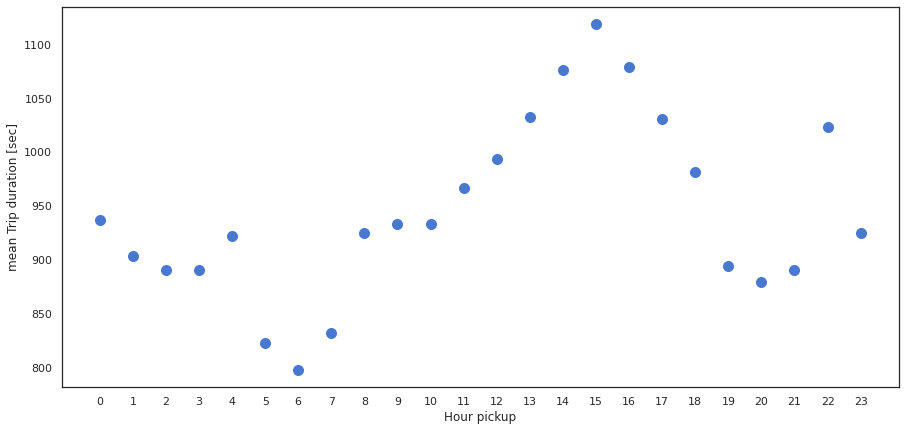

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15, 7))
plt.scatter(x=taxi_df.groupby(['pickup_hour'])['trip_duration'].mean().index, y = taxi_df.groupby(['pickup_hour'])['trip_duration'].mean(),s=100, color = 'b')
plt.xticks(taxi_df.groupby(['pickup_hour'])['trip_duration'].mean().index)
plt.ylabel('mean Trip duration [sec]')
plt.xlabel('Hour pickup');
plt.show()

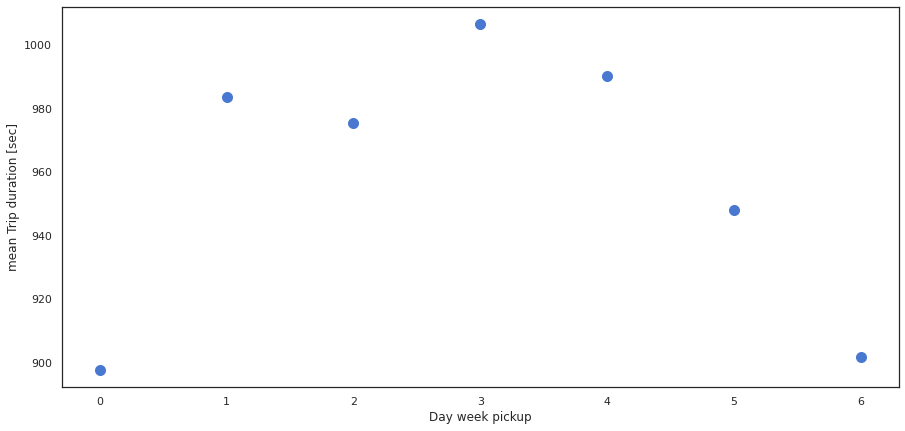

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(x=taxi_df.groupby(['pickup_day'])['trip_duration'].mean().index, y = taxi_df.groupby(['pickup_day'])['trip_duration'].mean(),s=100, color = 'b')
plt.xticks(taxi_df.groupby(['pickup_day'])['trip_duration'].mean().index)
plt.ylabel('mean Trip duration [sec]')
plt.xlabel('Day week pickup');
plt.show()

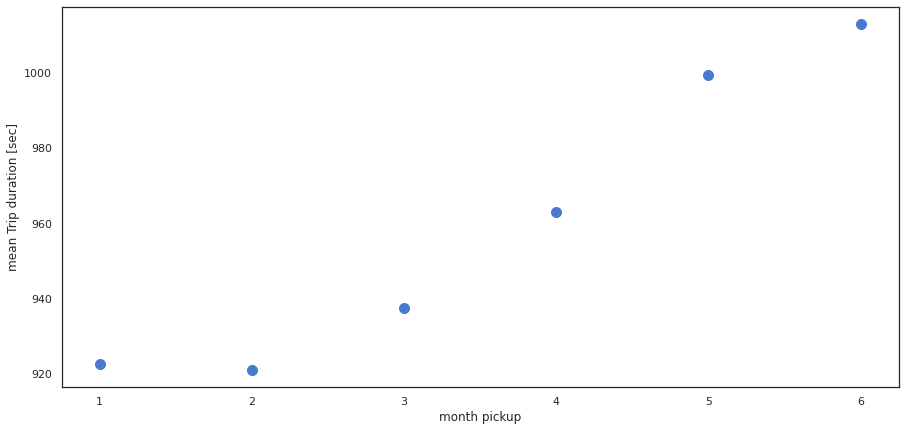

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(x=taxi_df.groupby(['pickup_month'])['trip_duration'].mean().index, y = taxi_df.groupby(['pickup_month'])['trip_duration'].mean(),s=100, color = 'b')
plt.xticks(taxi_df.groupby(['pickup_month'])['trip_duration'].mean().index)
plt.ylabel('mean Trip duration [sec]')
plt.xlabel('month pickup');
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that shows the relationship between different variables. This data is shown by placing various data points between an x- and y-axis. Essentially, each of these data points looks “scattered” around the graph, giving this type of data visualization its name.

##### 2. What is/are the insight(s) found from the chart?

* From the graph it is possible to see that the trips made between 1 pm and 5 pm have an average duration greater than 900 seconds, being the period that has an average greater than all other times. This may indicate that this period is the time of greatest traffic in this city.
* Trips made between 2 am and 6 am have the lowest average trip duration. However, there is spike at around 5 am.
* Trips made between 23:00 and 05:00 seem to have a decreasing relation of trip duration with the passage of time.
* Between the period from 6:00 am to 3:00 pm there is a gradual increase in the average duration of the trip.
* Between the period from 17:00 to 19:00 there is a gradual decrease in the average duration of the trip.
* It is possible to identify an increasing relationship between the trip duration average and the days from Monday to Thursday. It is possible to identify a decreasing relationship between the trip duration average and the days from Thursday to Sunday.
* The days with the lowest average trip duration values are the weekends. This could be because the weekends are less busy or because on weekends the taxi and limousine systems are more used at off-peak times. To visualize this better, a counting chart will be created taking into account only the weekend based on the time of travel.
* There is an increasing linear relationship between the months and the average value of the duration of trips. As the one-year cycle for data analysis was not completed, it may be that this information is not as relevant, as this may be a cyclical effect and not a growing effect over the months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using these insights an organization can easily know about the peak hours or peak time which affect the business. As we know from studies, peak hour traffic in major Indian cities almost doubles the travel time along some popular routes. Using this study an organization can plan according to reduce the negative impact on their business.

#### Chart - 7 - Correlation Heatmap

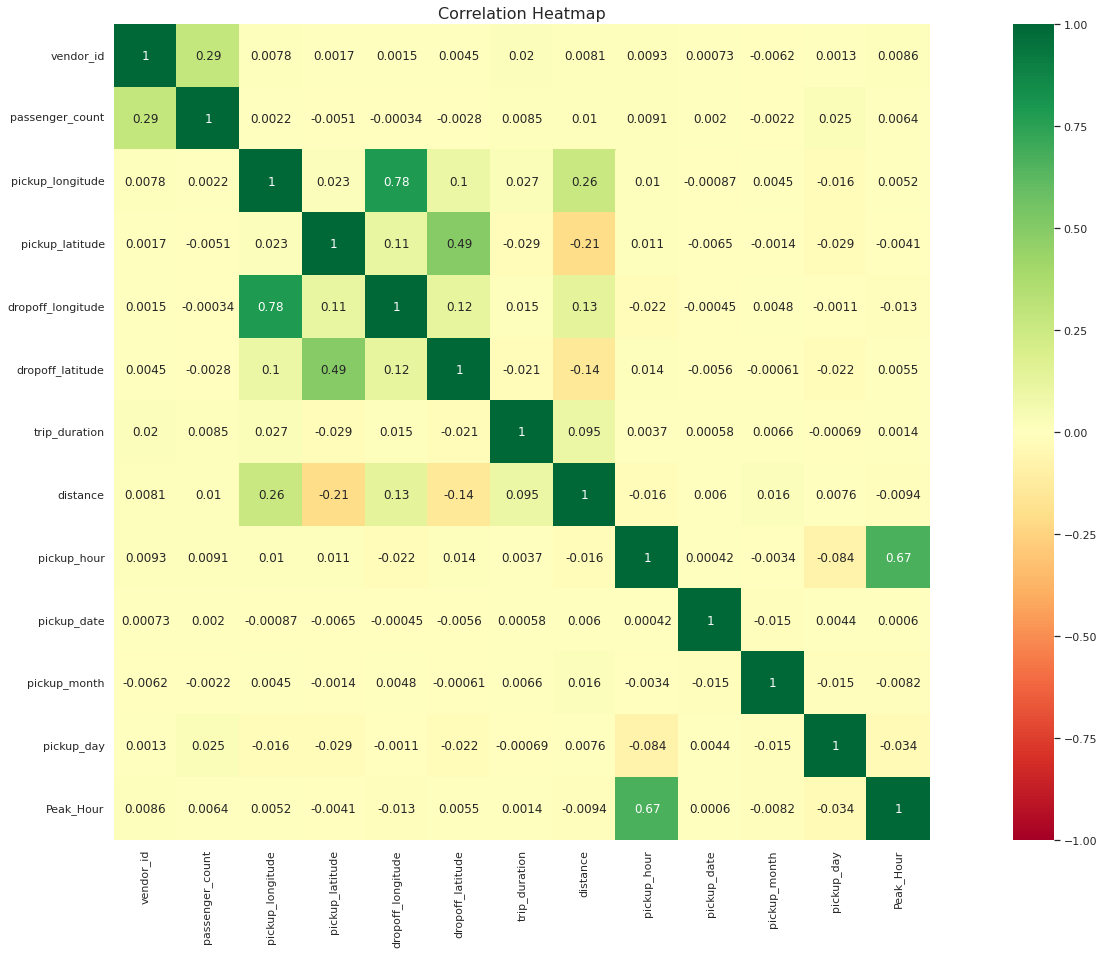

In [ ]:
# Correlation Heatmap visualization code
plt.figure (figsize= (30,15))

sns.heatmap(taxi_df.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Examining Pearson's and Spearman's rank correlation matrices, it can be seen that no correlation values are greater than the cut-off value initially defined, therefore no variable will be removed.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Trip duration is positively correlated with the distance.
* Trip duration is positively correlated with the pickup hour.
* Trip duration is positively correlated with the pickup day.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Trip duration is positively correlated with the distance.

Null Hypothesis H0: 𝛽1 = 0

Alternate Hypothesis H1: 𝛽1 > 0

Test: Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='trip_duration ~ distance', data= taxi_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print(f"Null Hypothesis rejected Successfully for p = {p_value}")
else:
    print(f"Failed to reject the Null Hypothesis for p = {p_value}.")

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the trip duration and distance travelled.

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Trip duration is positively correlated with the pickup hour.

Null Hypothesis H0: 𝛽1 = 0

Alternate Hypothesis H1: 𝛽1 > 0

Test: Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='trip_duration ~ pickup_hour', data= taxi_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print(f"Null Hypothesis rejected Successfully for p = {p_value}")
else:
    print(f"Failed to reject the Null Hypothesis for p = {p_value}.")

Null Hypothesis rejected Successfully for p = 8.597996212925806e-06


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the the trip duration and pickup hour.

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Trip duration is positively correlated with the pickup day.

Null Hypothesis H0: 𝛽1 = 0

Alternate Hypothesis H1: 𝛽1 > 0

Test: Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='trip_duration ~ pickup_day', data= taxi_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print(f"Null Hypothesis rejected Successfully for p = {p_value}")
else:
    print(f"Failed to reject the Null Hypothesis for p = {p_value}.")

Failed to reject the Null Hypothesis for p = 0.4064339972513583.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the trip duration and pickup day.

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values found in the dataset

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments for trip_duration
percentile_q1_trip_duration = np.percentile(taxi_df['trip_duration'],25)
percentile_q3_trip_duration = np.percentile(taxi_df['trip_duration'],75)
IQR = percentile_q3_trip_duration - percentile_q1_trip_duration
whisker_1 = percentile_q1_trip_duration - (1.5*IQR)
whisker_2 = percentile_q3_trip_duration + (1.5*IQR)

whisker_1, whisker_2
print("lower limit for outlier  :", whisker_1)
print("Upper limit for outlier  :", whisker_2)

lower limit for outlier  : -620.0
Upper limit for outlier  : 2092.0


In [ ]:
taxi_df = taxi_df[taxi_df['trip_duration']>0]
taxi_df = taxi_df[taxi_df['trip_duration']<whisker_2]

In [ ]:
# Handling Outliers & Outlier treatments for passenger_count
percentile_q1_passenger_count = np.percentile(taxi_df['passenger_count'],25)
percentile_q3_passenger_count = np.percentile(taxi_df['passenger_count'],75)

IQR3 = percentile_q3_passenger_count - percentile_q1_passenger_count
whisker_31 = percentile_q1_passenger_count - (1.5*IQR3)
whisker_32 = percentile_q3_passenger_count + (1.5*IQR3)

whisker_31, whisker_32
print("lower limit for outlier  :", whisker_31)
print("Upper limit for outlier  :", whisker_32)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [ ]:
taxi_df = taxi_df[taxi_df['passenger_count']>0]
taxi_df = taxi_df[taxi_df['passenger_count']<whisker_32]

In [ ]:
# Handling Outliers & Outlier treatments for distance
percentile_q1 = np.percentile(taxi_df['distance'],25)
percentile_q3 = np.percentile(taxi_df['distance'],75)
IQR2 = percentile_q3 - percentile_q1
whisker_21 = percentile_q1 - (1.5*IQR2)
whisker_22 = percentile_q3 + (1.5*IQR2)

whisker_21, whisker_22
print("lower limit for outlier  :", whisker_21)
print("Upper limit for outlier  :", whisker_22)

lower limit for outlier  : -2.2316082501514933
Upper limit for outlier  : 6.912672636994813


In [ ]:
taxi_df = taxi_df[taxi_df['distance']>whisker_21]
taxi_df = taxi_df[taxi_df['distance']<whisker_22]

##### What all outlier treatment techniques have you used and why did you use those techniques?

I've replaced outliers with whisker values (log transform or square root transform can also be used). Values at the lower end should be imputed by the lower whisker (i.e., Q1-1.5 IQR) and the values at the upper end should be imputed by the upper whisker (ie., Q3+1.5IQR).

If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

* lower inner fence: Q1–1.5*IQ
* upper inner fence: Q3 + 1.5*IQ
* lower outer fence: Q1–3*IQ
* upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#Dummify all the categorical features like "pickup_day" except
taxi_df= pd.get_dummies(taxi_df, columns=["pickup_day"], prefix=['day'])

In [ ]:
# One hot encoding for store_and_fwd_flag values
taxi_df['store_and_fwd_flag'] = taxi_df['store_and_fwd_flag'].replace({'Y' : 1, 'N' : 0})

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding for pickup_day and store_and_fwd_flag.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
num_cols = list(taxi_df.select_dtypes(exclude='object').columns)
cate_cols = list(taxi_df.select_dtypes(include='object').columns)
print("Num cols: ",num_cols)
print("Cate cols: ",cate_cols)

Num cols:  ['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'distance', 'pickup_hour', 'pickup_date', 'pickup_month', 'Peak_Hour', 'duration_time', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6']
Cate cols:  ['id', 'pickup_weekday', 'pickup_timezone', 'dropoff_timezone']


In [ ]:
# Select your features wisely to avoid overfitting
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',\
            'dropoff_latitude', 'distance', 'pickup_hour', 'pickup_date', 'pickup_month', 'store_and_fwd_flag',\
            'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'Peak_Hour']

##### What all feature selection methods have you used  and why?

Selected only thse features which are effective.

##### Which all features you found important and why?

I've selected vendor_id, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, distance, pickup_hour, pickup_date, pickup_month, store_and_fwd_flag, day_0, day_1, day_2, day_3, day_4, day_5, day_6, Peak_Hour.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Data for all the independent variables
X = taxi_df[features]

# Data for the dependent variable
Y = taxi_df['trip_duration']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

In this case the training dataset is small, that's why I have taken 80:20 ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(913487, 19) (913487,)
(228372, 19) (228372,)


In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt, yt, yp, disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE = round(mean_squared_error(yt, yp), 4)
  RMSE = (np.sqrt(MSE))
  R2 = (r2_score(y_true=yt, y_pred=yp))
  Adjusted_R2 = (1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :", MSE)
    print("RMSE :", RMSE)
    print("R2 :", R2)
    print("Adjusted R2 :", Adjusted_R2)
  
  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted", "Actual"])
  plt.title('Actual and Predicted Time Duration')

  return (MSE, RMSE, R2, Adjusted_R2) 

### ML Model - 1

In [ ]:
# Linear Regression Implementation
# Fit the Algorithm
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
# Predict on the model
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 81018.6033
RMSE : 284.6376702054737
R2 : 0.4883354567042123
Adjusted R2 : 0.488324814145343


(81018.6033, 284.6376702054737, 0.4883354567042123, 0.488324814145343)

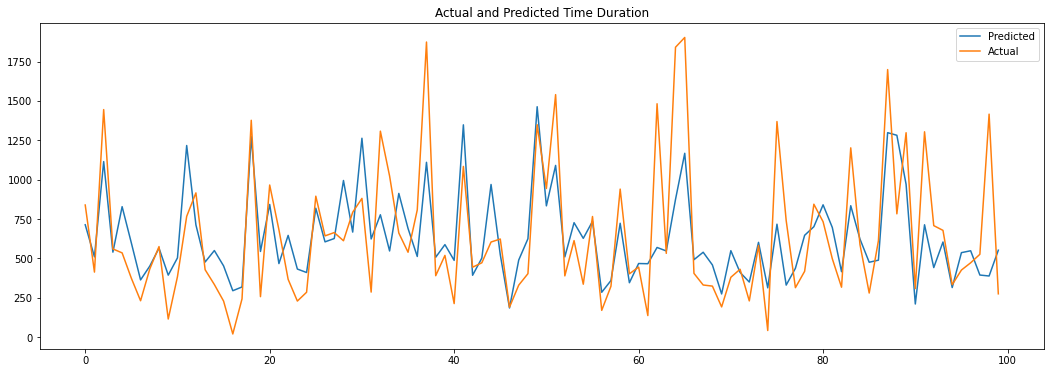

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train, Y_train, y_pred_train)

MSE : 81277.316
RMSE : 285.0917676819168
R2 : 0.49009704208282723
Adjusted R2 : 0.4900546156700941


(81277.316, 285.0917676819168, 0.49009704208282723, 0.4900546156700941)

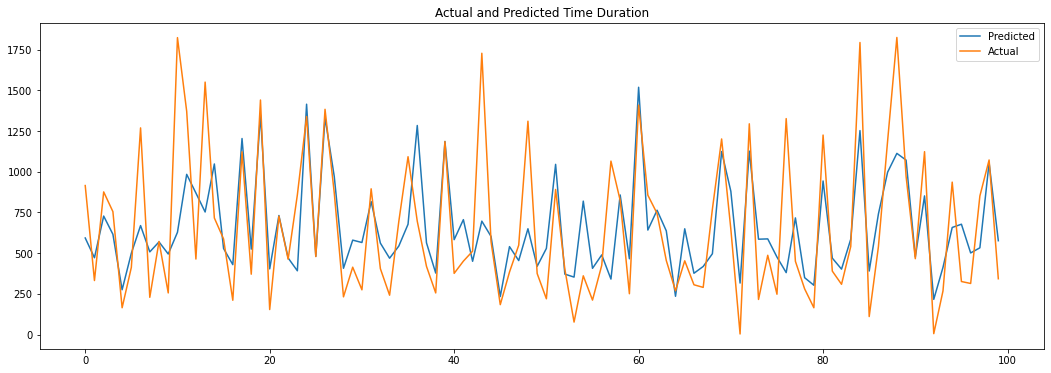

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test, Y_test, y_pred_test)

In [ ]:
sns.distplot(Y_test - y_pred_test ).set_title("error distribution between actual and predicted values")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization using GridSearch CV and L1 normalization
# Cross Validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
# Fit the Algorithm
lasso_regressor.fit(X_train, Y_train)
print("The best fit alpha value is found out to be :" , lasso_regressor.best_params_)
print("\nUsing ", lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  0.4879653327338824


MSE : 81018.6033
RMSE : 284.6376702054737
R2 : 0.48833545670421186
Adjusted R2 : 0.48832481414534257


(81018.6033, 284.6376702054737, 0.48833545670421186, 0.48832481414534257)

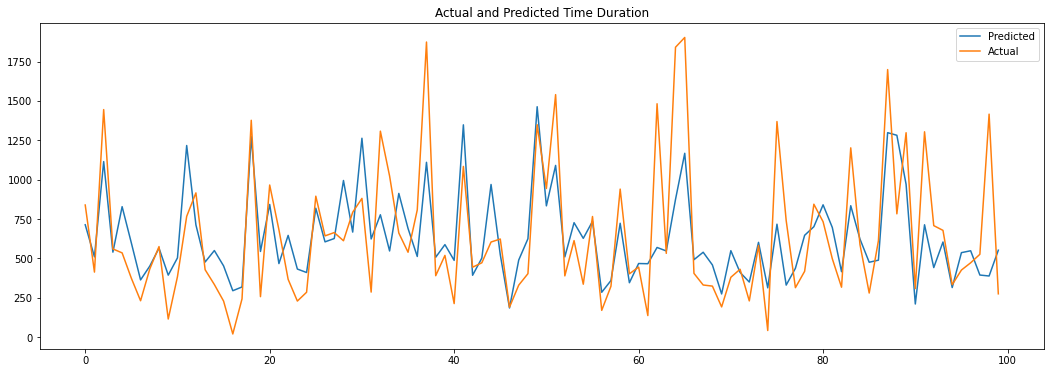

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train, Y_train, y_pred_lasso_train)

MSE : 81277.316
RMSE : 285.0917676819168
R2 : 0.4900970420828267
Adjusted R2 : 0.49005461567009356


(81277.316, 285.0917676819168, 0.4900970420828267, 0.49005461567009356)

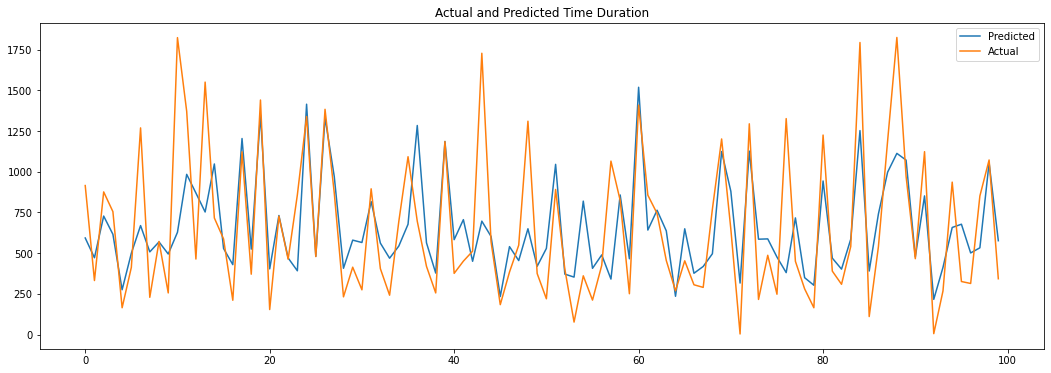

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test, Y_test, y_pred_lasso)

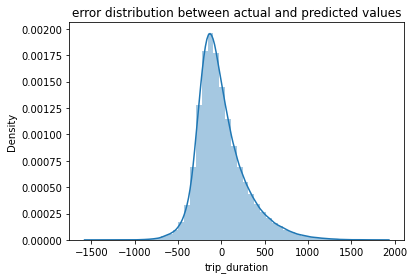

In [ ]:
sns.distplot(Y_test - y_pred_lasso ).set_title("error distribution between actual and predicted values")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement is visible.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# XGBoost
xgb_model = xgb.XGBRegressor()

# Fit the Algorithm
xg_models = xgb_model.fit(X_train,Y_train)

# Making predictions on train and test data
train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

[03:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


MSE : 60563.6739
RMSE : 246.09687909439242
R2 : 0.6175164311205024
Adjusted R2 : 0.6175084755098358


(60563.6739, 246.09687909439242, 0.6175164311205024, 0.6175084755098358)

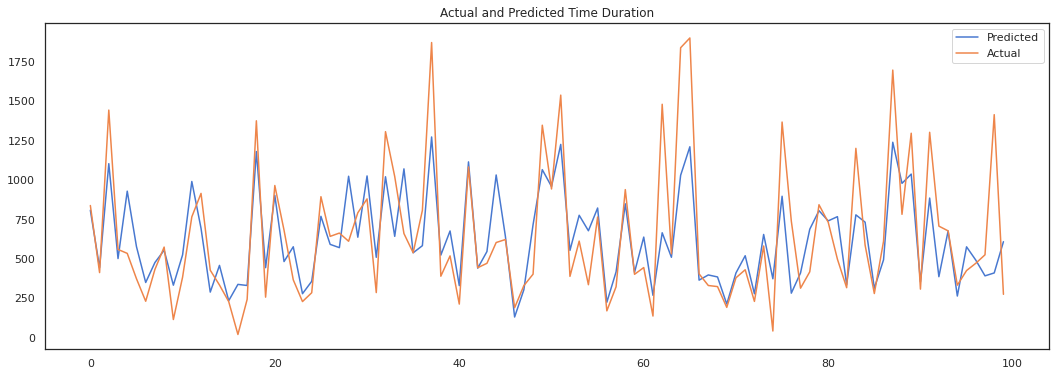

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train, Y_train, train_class_preds)

MSE : 60691.8544
RMSE : 246.3571683552155
R2 : 0.619242396519698
Adjusted R2 : 0.6192107156302549


(60691.8544, 246.3571683552155, 0.619242396519698, 0.6192107156302549)

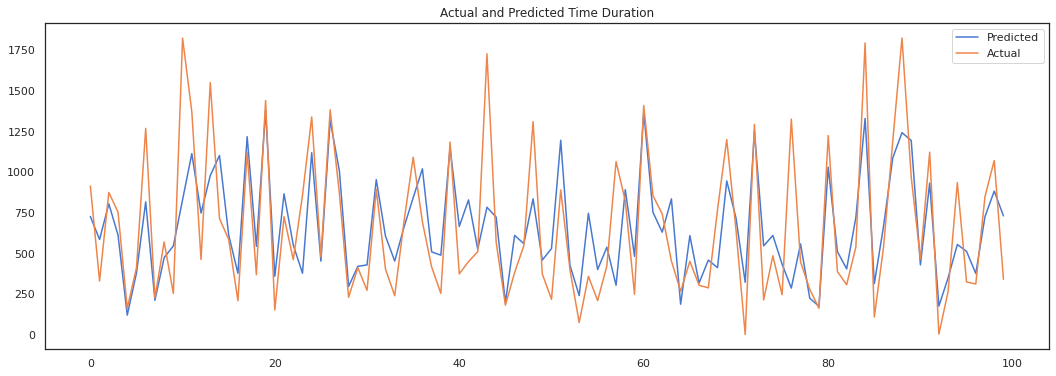

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test, Y_test, test_class_preds)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter GridSearch CV
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split}

In [ ]:
xgb_model = xgb.XGBRegressor()
# Grid search
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = param_xgb, cv = 3, verbose = 2, scoring = "r2")
xgb_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[03:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time= 1.1min
[03:25:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  57.7s
[03:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  57.3s
[03:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time= 1.9min
[03:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [ ]:
xgb_grid.best_score_

0.7264758070848534

In [ ]:
xgb_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [ ]:
xgb_optimal_model =xgb_grid.best_estimator_

In [ ]:
y_pred_xgb_test = xgb_optimal_model.predict(X_test)
y_pred_xgb_train = xgb_optimal_model.predict(X_train)

MSE : 39624.7195
RMSE : 199.05958781229302
R2 : 0.7497542147168954
Adjusted R2 : 0.7497490096356825


(39624.7195, 199.05958781229302, 0.7497542147168954, 0.7497490096356825)

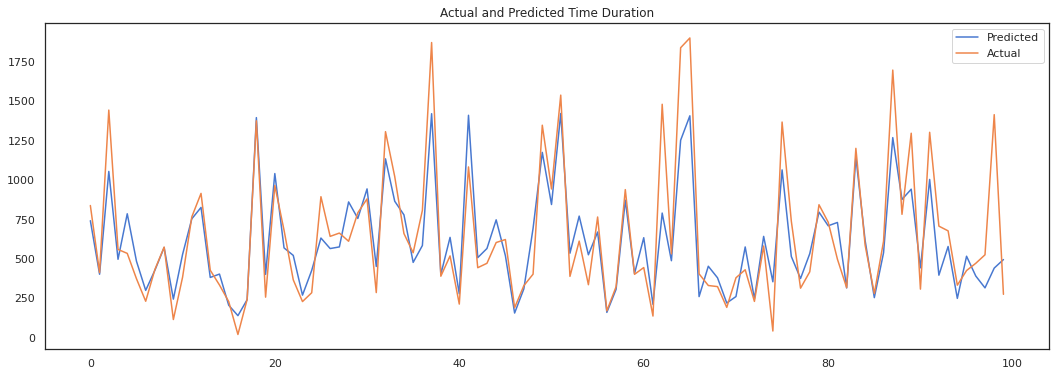

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train, Y_train, y_pred_xgb_train)

MSE : 42987.8545
RMSE : 207.33512606406083
R2 : 0.7303105558760847
Adjusted R2 : 0.730288116399144


(42987.8545, 207.33512606406083, 0.7303105558760847, 0.730288116399144)

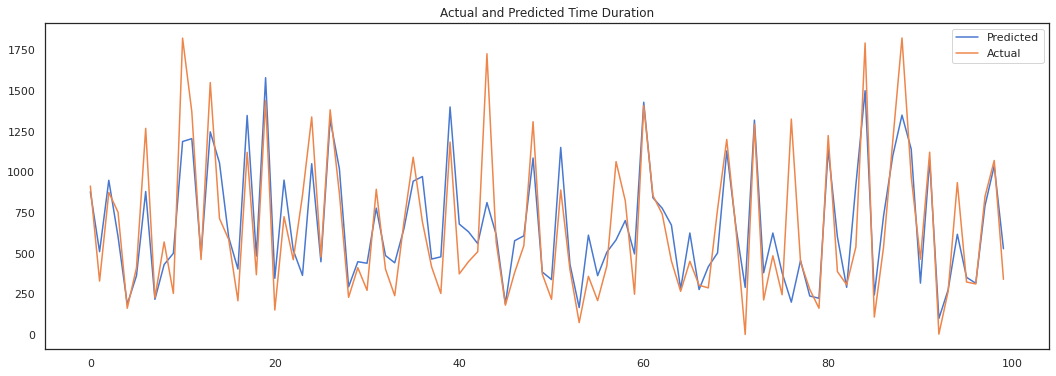

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test, Y_test, y_pred_xgb_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is little improvement in the model after hyperparameter tuning.

In [ ]:
from prettytable import PrettyTable
comp = PrettyTable(['SL NO',"METRICES", "Without Hyperparameter Tuning", "With Hyperparameter Tuning"])
comp.add_row(['1','Train MSE','60563.67', '39624.72'])
comp.add_row(['1','Test MSE','60691.85', '42987.85'])
comp.add_row(['2','Train RMSE','246.10','199.06'])
comp.add_row(['2','Test RMSE','246.36','207.34'])
comp.add_row(['3','Train R2 ','0.62','0.75'])
comp.add_row(['3','Test R2 ','0.62','0.75'])
comp.add_row(['4','Train Adjusted R2','0.62','0.73'])
comp.add_row(['4','Test Adjusted R2','0.62','0.73'])
print(comp)

+-------+-------------------+-------------------------------+----------------------------+
| SL NO |      METRICES     | Without Hyperparameter Tuning | With Hyperparameter Tuning |
+-------+-------------------+-------------------------------+----------------------------+
|   1   |     Train MSE     |            60563.67           |          39624.72          |
|   1   |      Test MSE     |            60691.85           |          42987.85          |
|   2   |     Train RMSE    |             246.10            |           199.06           |
|   2   |     Test RMSE     |             246.36            |           207.34           |
|   3   |     Train R2      |              0.62             |            0.75            |
|   3   |      Test R2      |              0.62             |            0.75            |
|   4   | Train Adjusted R2 |              0.62             |            0.73            |
|   4   |  Test Adjusted R2 |              0.62             |            0.73            |

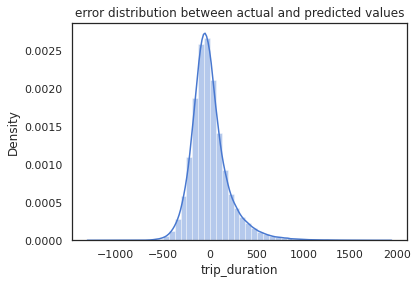

In [ ]:
sns.distplot(Y_test - y_pred_xgb_test).set_title("error distribution between actual and predicted values")
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

I've used MSE, RMSE, R2 and Adjusted R2 evaluation metics for a positive business impact.

* MSE: Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
* RMSE: Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
* R2: The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
* Adjusted R2: Adjusted R squared is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.

The lower value of MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R2 is considered desirable. R2 value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R2 solves this problem.

The smaller the MSE, the closer we are to finding the line of best fit. However, depending on the data, it may be impossible to get a very small value for the mean squared error. Similarly lower values of RMSE indicate better fit. R2 and adjusted R2 both can take any values between 0 to 1, a higher value is an indicator of a better fit for the observations.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
# Fit the Algorithm
gb_model.fit(X_train, Y_train)
# Predict on the model
y_preds_gb = gb_model.predict(X_test)
y_pred_gb_train = gb_model.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 60394.3811
RMSE : 245.75268279308773
R2 : 0.61858558186124
Adjusted R2 : 0.6185776484887759


(60394.3811, 245.75268279308773, 0.61858558186124, 0.6185776484887759)

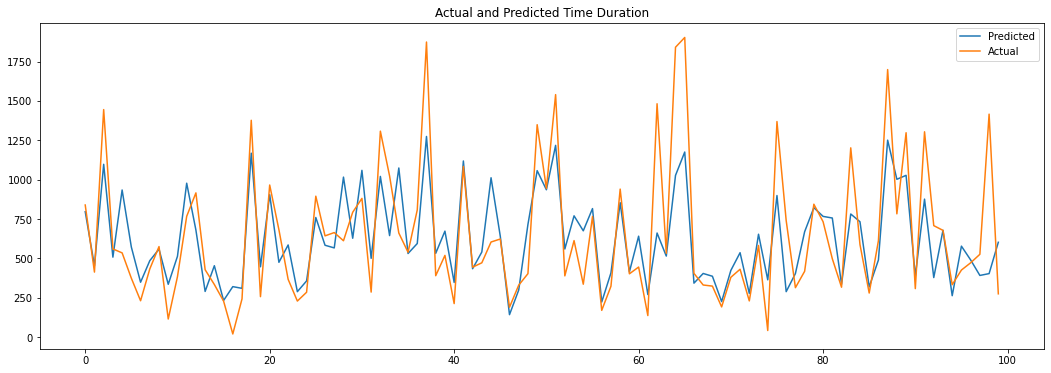

In [ ]:
# Evaluation metrics for Train set
EvaluationMetric(X_train, Y_train, y_pred_gb_train)

MSE : 60510.0576
RMSE : 245.98792165470238
R2 : 0.6203829199517727
Adjusted R2 : 0.6203513339594411


(60510.0576, 245.98792165470238, 0.6203829199517727, 0.6203513339594411)

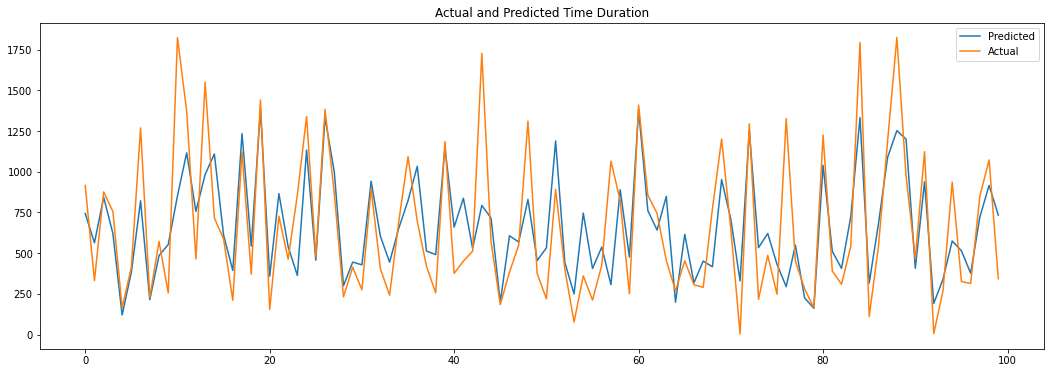

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test, Y_test, y_preds_gb)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter GridSearch CV
# Number of trees
n_estimators = [50,70]
# Maximum depth of trees
max_depth = [3,5,7]
# Minimum number of samples required to split a node
min_samples_split = [50,70]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# Grid search
gb_grid = GridSearchCV(estimator=gb_model, param_grid = param_gb, cv = 3, verbose=2, scoring='r2')
# Fit the Algorithm
gb_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time= 1.9min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time= 2.0min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time= 1.9min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=70; total time= 2.7min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=70; total time= 2.8min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=70; total time= 2.8min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=70, n_estimators=50; total time= 2.0min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=70, n_estimators=50; total time= 2.0min
[CV] END max_depth=3, min_samples_leaf=40, min_samples_split=70, n_estimators=50; total time= 1.9min
[CV] END max_depth=3, min_samp

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 70],
                         'n_estimators': [50, 70]},
             scoring='r2', verbose=2)

In [ ]:
gb_grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 40,
 'min_samples_split': 70,
 'n_estimators': 70}

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=7, min_samples_leaf=40,
                          min_samples_split=70, n_estimators=70)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# Predict on the model
y_preds_ogb = gb_optimal_model.predict(X_test)
y_pred_ogb_train = gb_optimal_model.predict(X_train)

MSE : 49163.237
RMSE : 221.72784443998006
R2 : 0.6895147016164425
Adjusted R2 : 0.6895082435608484


(49163.237, 221.72784443998006, 0.6895147016164425, 0.6895082435608484)

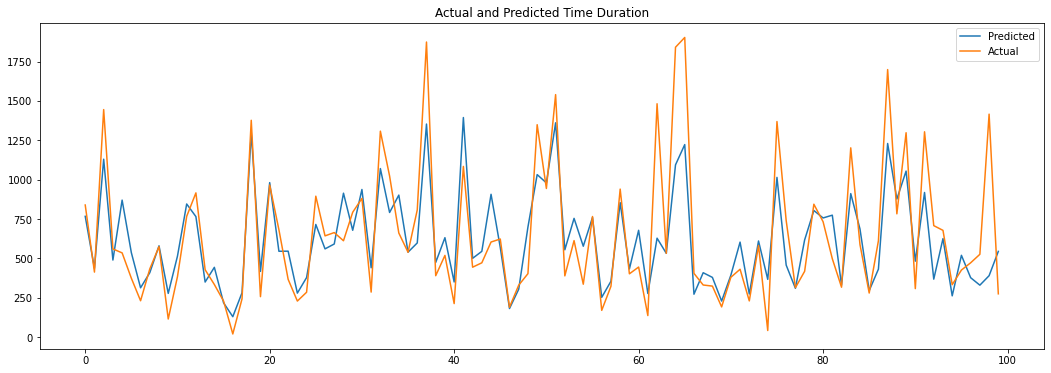

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train, Y_train, y_pred_ogb_train)

MSE : 49915.7648
RMSE : 223.4183627189135
R2 : 0.6868474825189698
Adjusted R2 : 0.6868214267023702


(49915.7648, 223.4183627189135, 0.6868474825189698, 0.6868214267023702)

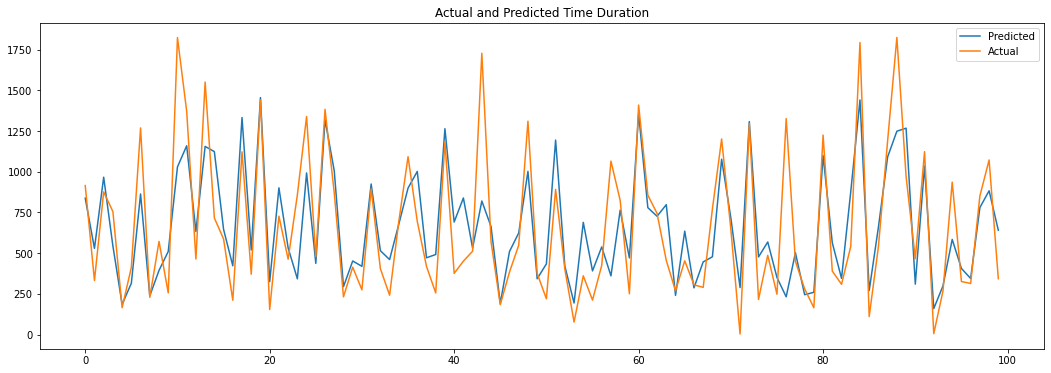

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test, Y_test, y_preds_ogb)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is little improvement in the model after hyperparameter tuning.

In [ ]:
from prettytable import PrettyTable
comp = PrettyTable(['SL NO',"METRICES", "Without Hyperparameter Tuning", "With Hyperparameter Tuning"])
comp.add_row(['1','Train MSE','60394', '49163.23'])
comp.add_row(['1','Test MSE','60510.06', '49915.76'])
comp.add_row(['2','Train RMSE','245.75','221.73'])
comp.add_row(['2','Test RMSE','245.99','223.42'])
comp.add_row(['3','Train R2 ','0.62','0.69'])
comp.add_row(['3','Test R2 ','0.62','0.69'])
comp.add_row(['4','Train Adjusted R2','0.62','0.69'])
comp.add_row(['4','Test Adjusted R2','0.62','0.69'])
print(comp)

+-------+-------------------+-------------------------------+----------------------------+
| SL NO |      METRICES     | Without Hyperparameter Tuning | With Hyperparameter Tuning |
+-------+-------------------+-------------------------------+----------------------------+
|   1   |     Train MSE     |             60394             |          49163.23          |
|   1   |      Test MSE     |            60510.06           |          49915.76          |
|   2   |     Train RMSE    |             245.75            |           221.73           |
|   2   |     Test RMSE     |             245.99            |           223.42           |
|   3   |     Train R2      |              0.62             |            0.69            |
|   3   |      Test R2      |              0.62             |            0.69            |
|   4   | Train Adjusted R2 |              0.62             |            0.69            |
|   4   |  Test Adjusted R2 |              0.62             |            0.69            |

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I've used MSE, RMSE, R2 and Adjusted R2 evaluation metics for a positive business impact.

* MSE: Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
* RMSE: Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
* R2: The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
* Adjusted R2: Adjusted R squared is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.

The lower value of MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R2 is considered desirable. R2 value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R2 solves this problem.

The smaller the MSE, the closer we are to finding the line of best fit. However, depending on the data, it may be impossible to get a very small value for the mean squared error. Similarly lower values of RMSE indicate better fit. R2 and adjusted R2 both can take any values between 0 to 1, a higher value is an indicator of a better fit for the observations.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. First of all I need accuracy for the time travel prediction. Thus, for greater accuracy I've used Lasso, XGB, GradientBoosting. Here is their evaluation metrics and I would like to compare.

In [ ]:
# Training Set
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','81018.6033', '284.6377', '0.49','0.49'])
train.add_row(['2','Lasso Regression','81018.6033','284.6377','0.49','0.49'])
train.add_row(['4','XGBRegressor','39624.7195','199.0596','0.75','0.75'])
train.add_row(['5','GradientBoosting','60394.3811','221.7278','0.69','0.69'])
print(train)

+-------+-------------------+------------+------------+-----------+--------------------+
| SL NO |     MODEL_NAME    | Train MSE  | Train RMSE | Train R^2 | Train Adjusted R^2 |
+-------+-------------------+------------+------------+-----------+--------------------+
|   1   | Linear Regression | 81018.6033 |  284.6377  |    0.49   |        0.49        |
|   2   |  Lasso Regression | 81018.6033 |  284.6377  |    0.49   |        0.49        |
|   4   |    XGBRegressor   | 39624.7195 |  199.0596  |    0.75   |        0.75        |
|   5   |  GradientBoosting | 60394.3811 |  221.7278  |    0.69   |        0.69        |
+-------+-------------------+------------+------------+-----------+--------------------+


In [ ]:
# Test Set
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','81277.316','285.0918','0.49','0.49'])
test.add_row(['2','Lasso Regression','81277.316','285.0918','0.49','0.49'])
test.add_row(['4','XGBRegressor','42987.8545','207.3351','0.73','0.73'])
test.add_row(['5','GradientBoosting','49915.7648','223.4184','0.69','0.69'])
print(test)

+-------+-------------------+------------+-----------+----------+-------------------+
| SL NO |     MODEL_NAME    |  Test MSE  | Test RMSE | Test R^2 | Test Adjusted R^2 |
+-------+-------------------+------------+-----------+----------+-------------------+
|   1   | Linear Regression | 81277.316  |  285.0918 |   0.49   |        0.49       |
|   2   |  Lasso Regression | 81277.316  |  285.0918 |   0.49   |        0.49       |
|   4   |    XGBRegressor   | 42987.8545 |  207.3351 |   0.73   |        0.73       |
|   5   |  GradientBoosting | 49915.7648 |  223.4184 |   0.69   |        0.69       |
+-------+-------------------+------------+-----------+----------+-------------------+


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_
  
  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)
  
  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))
  
  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values
  
  
  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

In [ ]:
# Getting feature importance
check_importance(xgb_optimal_model, X_train)

,Feature,Feature Importance
6,distance,0.48
17,day_6,0.09
7,pickup_hour,0.07
16,day_5,0.07
11,day_0,0.06
5,dropoff_latitude,0.03
9,pickup_month,0.02
13,day_2,0.02
2,pickup_longitude,0.02
4,dropoff_longitude,0.02


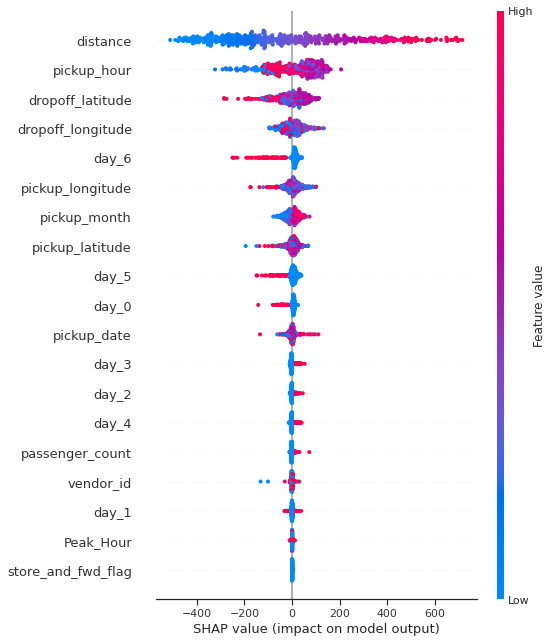

In [ ]:
# Interpretting the model using shaply
# Using a random sample of the dataframe for better time computation
X_sampled = X_train.sample(500, random_state=50)
xgb_explainer = shap.TreeExplainer(xgb_optimal_model)
xgb_shap_values = xgb_explainer.shap_values(X_sampled)
shap.summary_plot(xgb_shap_values, X_sampled, plot_type="dot")

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. SHAP values represent a feature's responsibility for a change in the model output. Vertical dispersion represents interaction effects with other features. To help reveal these interactions dependence_plot automatically selects another feature for coloring.

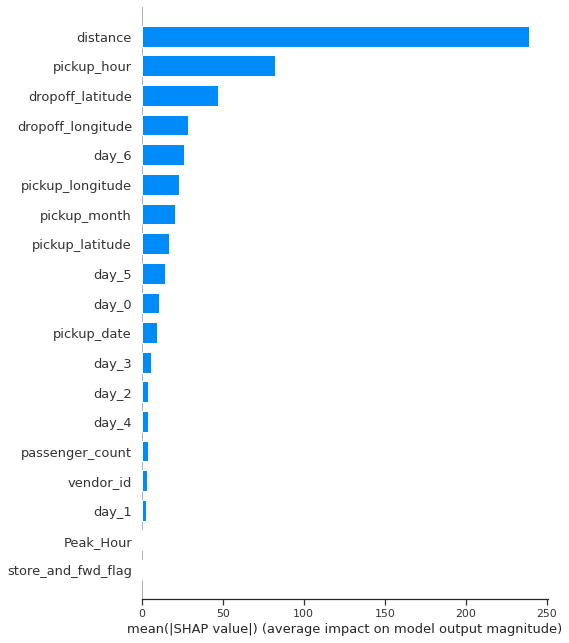

In [ ]:
shap.summary_plot(xgb_shap_values, X_sampled, plot_type="bar")

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After implementing the algorithms, we come across that XGBoost is better than other models as it shows a slightly good result than the others. This in turn helps to conclude that XGBoost Model is more efficient and reliable in predicting the taxi trip duration as compared to other models. We can also check LightGBM model if it works better than XGB model.

As a part of the future work, variabilities and quantities related to the various location features might also be computed in the upcoming research in order to localize the traffic-based effects on the taxi prediction coordinates. Speed limitations-based features could later be incorporated alongside to comprehend better analysis of the datasets.

There's always a room for the improvement and a lot more to explore. t this point, here are a few things we could do to improve our model:

* Add more training instances to improve validation curve in the XGBoost model.
* Increase the regularization for the learning algorithm. This should decrease the variance and increase the bias towards the validation curve.
* Reduce the numbers of features in the training data that we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***